<h1> Procesamiento de las imágenes </h1>



Para el procesamiento de las imagenes, el primer paso es leerlas de la carpeta correspondiente, la cual se encuentra en la carpeta srcImg, por lo tanto:

# Librerias en general

Filtros para detectar vidrio
2.- transformada de hough para recortar el centro para lineas verticales
Filtro de gabor 
1.- hacer pruebas con imagenes recortadas a solo la pecera para ver su procesamiento e histogramas 
busqueda de contornos


In [3]:
"""
Biblioteca:
-   cv2             Manejo de imágenes
-   numpy           Manejo de arreglos de pixeles
(Prueba)-   cv2_imshow      Parche para mostrar imágenes en Colab

-   time            Biblioteca para debuggear
-   matplotlib      Manejo de las impresiones de imagenes
"""
%matplotlib inline

import os
import cv2
import numpy as np
import random
#from google.colab.patches import cv2_imshow

import time 
from matplotlib import pyplot as plt

# Dirección principal
dir = "c:/Users/jose_/Desktop/Tesis/Programa"
# Direccion de guardado de imágenes
outDir = os.getcwd()+"\Imagenes"
# Direccion de carga de videos
inDir = os.getcwd()+"\Videos"
#Dirección de guardado de cada canal
outChan = os.getcwd()+"\Canales"
#Dirección de guardado de los histogramas de cada canal
outHist = os.getcwd()+"\Histogramas"



# Obteniendo las imagenes
global imgs 
global file_names


# <h1> Métodos para guardar imagenes en una carpeta determinada </h1>

In [165]:
def saveImages(dir, text, lImgs):
    os.chdir(dir)
    count = 1
    for img in lImgs:
        cv2.imwrite("",img)
        cv2.imwrite(text+ str(count ) + ".jpg", img)

## Creamos un método para obtener las imágenes de una carpeta determinada


In [4]:
"""
    Método getImages, el cual nos permite obtener todas las imagenes guardadas en una determinada carpeta
    Entrada: No recibe nada
    Salida: Una lista de imagenes
"""
def getImages(dir):

    images = list()                                 # Creamos una lista en donde guardaremos temporalmente las imagenes con el fin de no duplicar imagenes
    names = list()
    file_names = os.listdir(dir)                 # Obtenemos el nombre de todos los archivos que se encuentran en la carpeta outDir (Es donde se guardan las imagenes)

    print(file_names)
    # file_names = sorted(file_names, key=lambda s: int(s.split('.')[0][5:])) # Ordenamos los archivos mediante el numero de la imagen

    # Creamos un bucle para cada elemento dentro de la carpeta    
    for file in file_names:
        print(file)
        image_path = dir + "/" + file            # Creamos la variable de la direccion de cada imagen
        image = cv2.imread(image_path)              # Leemos la imagen
        if image is None:                           # Si por alguna cuestion no se puede leer la imagen se descarta
            continue
            
        images.append(image)                        # Agregamos la imagen leida a la lista de imagenes
        names.append(file)

    return images, names                            # Retornamos la lista de imagenes

# Asignamos la lista de imagenes que regresa el metodo getImages a la lista global imgs
imgs, file_names = getImages(outDir)

['image0000.jpg', 'image0001.jpg', 'image0002.jpg', 'image0003.jpg', 'image0004.jpg', 'image0005.jpg', 'image0006.jpg', 'image0007.jpg', 'image0008.jpg', 'image0009.jpg', 'image0010.jpg', 'image0011.jpg', 'image0012.jpg', 'image0013.jpg', 'image0014.jpg', 'image0015.jpg', 'image0016.jpg', 'image0017.jpg', 'image0018.jpg', 'image0019.jpg', 'image0020.jpg', 'image0021.jpg', 'image0022.jpg', 'image0023.jpg', 'image0024.jpg', 'image0025.jpg', 'image0026.jpg', 'image0027.jpg', 'image0028.jpg', 'image0029.jpg', 'image0030.jpg', 'image0031.jpg', 'image0032.jpg', 'image0033.jpg', 'image0034.jpg', 'image0035.jpg', 'image0036.jpg', 'image0037.jpg', 'image0038.jpg', 'image0039.jpg', 'image0040.jpg', 'image0041.jpg', 'image0042.jpg', 'image0043.jpg', 'image0044.jpg', 'image0045.jpg', 'image0046.jpg', 'image0047.jpg', 'image0048.jpg', 'image0049.jpg', 'image0050.jpg', 'image0051.jpg', 'image0052.jpg', 'image0053.jpg', 'image0054.jpg', 'image0055.jpg', 'image0056.jpg', 'image0057.jpg', 'image0058.jp

image0004.jpg
image0005.jpg
image0006.jpg
image0007.jpg
image0008.jpg
image0009.jpg
image0010.jpg
image0011.jpg
image0012.jpg
image0013.jpg
image0014.jpg
image0015.jpg
image0016.jpg
image0017.jpg
image0018.jpg
image0019.jpg
image0020.jpg
image0021.jpg
image0022.jpg
image0023.jpg
image0024.jpg
image0025.jpg
image0026.jpg
image0027.jpg
image0028.jpg
image0029.jpg
image0030.jpg
image0031.jpg
image0032.jpg
image0033.jpg
image0034.jpg
image0035.jpg
image0036.jpg
image0037.jpg
image0038.jpg
image0039.jpg
image0040.jpg
image0041.jpg
image0042.jpg
image0043.jpg
image0044.jpg
image0045.jpg
image0046.jpg
image0047.jpg
image0048.jpg
image0049.jpg
image0050.jpg
image0051.jpg
image0052.jpg
image0053.jpg
image0054.jpg
image0055.jpg
image0056.jpg
image0057.jpg
image0058.jpg
image0059.jpg
image0060.jpg
image0061.jpg
image0062.jpg
image0063.jpg
image0064.jpg
image0065.jpg
image0066.jpg
image0067.jpg
image0068.jpg
image0069.jpg
image0070.jpg
image0071.jpg
image0072.jpg
image0073.jpg
image0074.jpg
image0

- Nos aseguramos que la lista de imagenes sea del mismo tamaño que la lista de archivos que se encuentran en la carpeta Imagenes

In [171]:
print(len(imgs))

print(len(file_names))

124
124


## Procesamiento de las imágenes

Para el procesamiento de las imágenes se probaran distintos métodos.

Parámetros:
- Entrada: Una lista de fotos a color.
- Salida: Una lista de imágenes a escala de grises y una lista de sus respectivos histogramas
__________________________________________________________

Primero creamos un método para imprimir dos imágenes en cuestión, cada una con su leyenda impresa en la parte superior de cada imagen

- txtimg: Leyenda a imprimir en imágen 1
- img1: Imágen 1 a imprimir
- txtimg2: Leyenda a imprimir en imágen 2
- img2: Imágen 2 a imprimir

In [168]:
"""
  Método para imprimir dos imagenes en la pantalla (una a un lado de la otra)
  con el fin de debuguear y observar la imagen original y la modificada
"""
def drawImages(txtimg1, img1, txtimg2, img2):
  plt.subplot(121)
  plt.imshow(img1,cmap = 'gray')

  plt.title(txtimg1)
  plt.xticks([]), plt.yticks([])

  plt.subplot(122)
  plt.imshow(img2,cmap = 'gray')

  plt.title(txtimg2)
  plt.xticks([]), plt.yticks([])

  plt.show()

### Ahora procedemos a la búsqueda de los histogramas en cada canal

Una vez obtenido el histograma, procedemos a guardarlo en la carpeta Histogramas

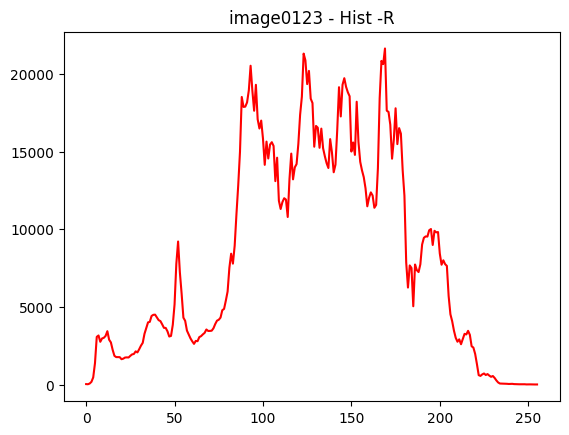

In [44]:
os.chdir(outHist)
for j, image in enumerate(imgs):
    # define colors to plot the histograms
    colors = ('b','g','r')
    hist = list()
    fname = os.path.splitext(file_names[j])[0]

    # compute and plot the image histograms
    for i,color in enumerate(colors):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))

    for i,h in enumerate(hist):
        plt.clf()
        plt.plot(h, colors[i])
        plt.title(fname + " - " + "Hist -" + colors[i].upper())
        plt.savefig(fname + " - " + colors[i].upper() + '.jpg')

os.chdir(dir)

- Corroboramos que nos encontremos en la carpeta raiz del proyecto 

In [169]:
print(os.listdir())
print(os.getcwd())

['Histogramas', 'Imagenes', 'ImagesProcessing.ipynb', 'Notas.md', 'VideoProcessing.ipynb', 'Videos']
c:\Users\jose_\Desktop\Tesis\Programa


### Procedemos a obtener el histograma en escala de grises

Una vez obtenido el histograma, procedemos a guardarlo en la carpeta Histogramas

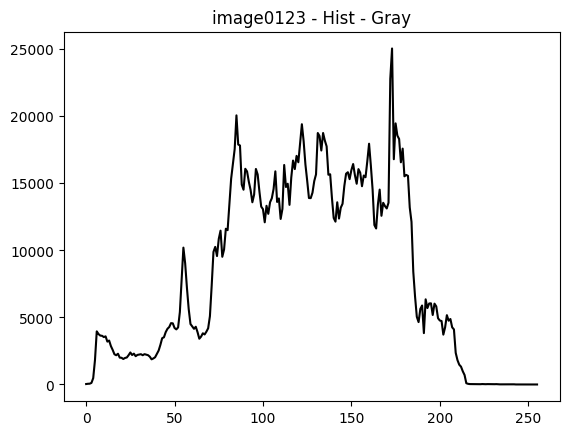

In [46]:
os.chdir(outHist)
for j, image in enumerate(imgs):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    fname = os.path.splitext(file_names[j])[0]

    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    plt.clf()
    plt.plot(hist, 'k')
    plt.title(fname + " - " + "Hist - Gray")
    plt.savefig(fname + " - Gray.jpg")
os.chdir(dir)

# <h1> Aqui iniciamos a separar las imagenes en cada canal B, G, R y Escala de Grises guardandolos en una lista distinta cada uno </h1>

In [5]:
b = list()
g = list()
r = list()
gray = list()

for img in imgs:

    cv2.imshow("Original ",img)

    bI, gI, rI = cv2.split(img)
    grayI = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    b.append(bI)
    g.append(gI)
    r.append(rI) 
    gray.append(grayI)

    cv2.imshow("B-Image", bI)
    
    cv2.imshow("G-Image", gI)
    cv2.imshow("R-Image", rI)
    
    # cv2.imshow("Gray-Image", gray)
    cv2.waitKey(100)
cv2.destroyAllWindows()

# Aqui inician las pruebas con los valores de umbral de cada canal

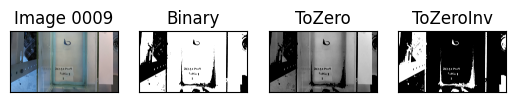

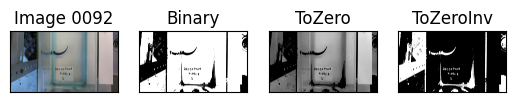

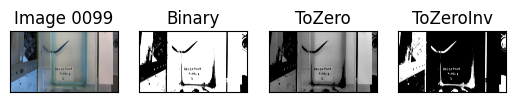

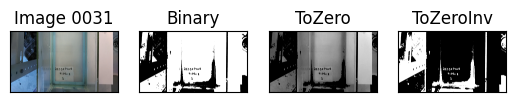

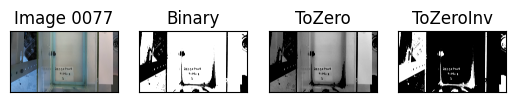

In [130]:
for i in range(0, 5, 1):
    n = random.randint(0, len(imgs)-1)

    img = imgs[n]
    # cv2.imshow("Image",img)
    B = img[:,:,0] # B
    G = img[:,:,1] # G
    R = img[:,:,2] # R

    # Threshold Blue Image
    # _, tresh = cv2.threshold(np.hstack([B]), 80, 255, cv2.THRESH_BINARY )
    # tresh = cv2.resize(tresh,(512,512))
    # cv2.imshow('Thresh B', treshB)

    # # Threshold Green Image
    # _, treshG = cv2.threshold(np.hstack([G]), 185, 255, cv2.THRESH_BINARY)
    # treshG = cv2.resize(treshG,(512,512))
    # cv2.imshow('Thresh G', treshG)

    # Threshold Red Image
    # _, treshR = cv2.threshold(np.hstack([R]), 180, 255, cv2.THRESH_BINARY)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)

    tsh = 80

    _, threshBinary = cv2.threshold(B, tsh, 255, cv2.THRESH_BINARY)
    _, threshToZero = cv2.threshold(B, tsh, 255, cv2.THRESH_TOZERO )
    _, threshToZeroInvImg = cv2.threshold(B, tsh, 255, cv2.THRESH_BINARY_INV)

    plt.subplot(341),plt.imshow(img, cmap = 'gray')
    plt.title('Image '+ file_names[n].split(".")[0][5:]), plt.xticks([]), plt.yticks([])
    plt.subplot(342),plt.imshow(threshBinary, cmap = 'gray')
    plt.title('Binary'), plt.xticks([]), plt.yticks([])
    plt.subplot(343),plt.imshow(threshToZero, cmap = 'gray')
    plt.title('ToZero'), plt.xticks([]), plt.yticks([])
    plt.subplot(344),plt.imshow(threshToZeroInvImg, cmap = 'gray')
    plt.title('ToZeroInv'), plt.xticks([]), plt.yticks([])
    plt.show()

    # cv2.waitKey(1000)
# cv2.destroyAllWindows()

# En esta segunda prueba creamos un desenfoque con el fin de obtener mejores resultados

- Primero hacemos un desenfoque con la función GaussianBlur
- Se ejecuta una busqueda de bordes con los valores entre 75 y 80


In [99]:
for img in imgs:
    img = cv2.resize(img, (512,512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dst = cv2.GaussianBlur(img,(11,11),cv2.BORDER_DEFAULT)

    tresh = cv2.Canny(img, 75, 80)

    # _, treshR = cv2.threshold(np.hstack([dst]), 80, 255, cv2.THRESH_BINARY)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)

    cv2.imshow("Image", np.hstack((img, dst, tresh)))
    cv2.waitKey(400)
cv2.destroyAllWindows()

# Recorremos todas las imagenes implementando una busqueda de bordes con la función Canny con los mismos valores de umbral usados anteriormente

In [1]:
i = 0
for img in imgs:
    img = cv2.resize(img, (512,512))
    # print(i)
    cv2.imshow("RGB-Image", img)
    # b,g,r = cv2.split(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    b[i] = cv2.Canny(b[i], 100, 110) #  60-70, 70-90, 100-110
    g[i] = cv2.Canny(g[i], 140, 150) # 100-110, 130-140, 140-150, 170-185
    r[i] = cv2.Canny(r[i], 130, 150) # 50-70, 90-110, 130-150, 170-180

    # cv2.imshow("BGR-Image", img)
    cv2.imshow("B-Image", b[i])
    
    cv2.imshow("G-Image", g[i])
    cv2.imshow("R-Image", r[i])
    cv2.imshow("Gray-Image", gray)
    cv2.waitKey(100)
    i = i+1
cv2.destroyAllWindows()

NameError: name 'imgs' is not defined

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = imgs[10]
img = cv2.resize(img, (512,512))
# GRISES
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = np.float64(img)

cv2.imshow("Imagen Original", img)
dft = cv2.dft(img)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(dft)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)

# MOSTRAMOS LA IMAGEN
img_frr = np.uint8(255*frr_log/np.max(frr_log))
cv2.imshow("Espectro de Fourier Logaritmica",img_frr)


cv2.waitKey(0)
cv2.destroyAllWindows()


NameError: name 'imgs' is not defined

In [7]:
for i in range(0, 5, 1):
    
    n = random.randint(0, len(imgs)-1)

    img = imgs[n]


    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Use canny edge detection
    edges = cv2.Canny(gray,50,80,apertureSize=3)
    
    cv2.imshow("edges", edges)
    # Apply HoughLinesP method to 
    # to directly obtain line end points
    lines_list =[]
    lines = cv2.HoughLinesP(
                edges, # Input edge image
                1, # Distance resolution in pixels
                np.pi/180, # Angle resolution in radians
                threshold=100, # Min number of votes for valid line
                minLineLength=20, # Min allowed length of line
                maxLineGap=30 # Max allowed gap between line for joining them
                )

    
    # Iterate over points
    for points in lines:
        # Extracted points nested in the list
        x1,y1,x2,y2=points[0]
        # Draw the lines joing the points
        # On the original image
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),1)
        # Maintain a simples lookup list for points
        lines_list.append([(x1,y1),(x2,y2)])
        
    # Save the result image
    cv2.imshow("Image", img)

    cv2.waitKey(2000)


cv2.destroyAllWindows()

# <h1> Iniciando la prueba de los filtros con la Transformada de Fourier </h1>

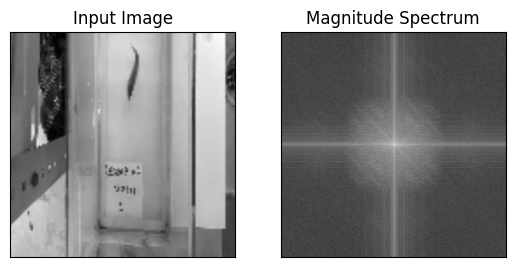

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = imgs[1]
img = cv2.resize(img, (512,512))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

f = np.fft.fft2(img)
# print(f)
fshift = np.fft.fftshift(f)
# print(fshift)
magnitude_spectrum = 20*np.log(np.abs(fshift))
# print(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(512, 512)


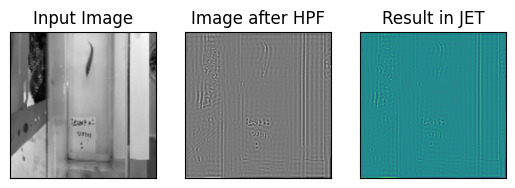

In [ ]:
print(img.shape)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
fshift[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

-------------------------------------------------------------------------------

---------------------------------------------------------------------------------------

# <center> <h1> Aqui inician las pruebas con las imagenes recortadas </h1> </center>

--------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------

In [8]:
"""
Biblioteca:
-   cv2             Manejo de imágenes
-   numpy           Manejo de arreglos de pixeles
(Prueba)-   cv2_imshow      Parche para mostrar imágenes en Colab

-   time            Biblioteca para debuggear
-   matplotlib      Manejo de las impresiones de imagenes
"""
%matplotlib inline

import os
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow

import time 
from matplotlib import pyplot as plt

# Dirección principal
dir = "c:/Users/jose_/Desktop/Tesis/Programa"
# Direccion de guardado de imágenes
outDir = os.getcwd()+"\Imagenes"
# Direccion de carga de videos
inDir = os.getcwd()+"\Videos"
#Dirección de guardado de cada canal
outChan = os.getcwd()+"\Canales"
#Dirección de guardado de los histogramas de cada canal
outHist = os.getcwd()+"\Histogramas"



# Obteniendo las imagenes
global imgs 
global file_names

In [9]:
"""
    Método getImages, el cual nos permite obtener todas las imagenes guardadas en una determinada carpeta
    Entrada: No recibe nada
    Salida: Una lista de imagenes
"""
def getImages(dir):
    dir = dir + "/Prueba"
    print(dir)
    images = list()                                 # Creamos una lista en donde guardaremos temporalmente las imagenes con el fin de no duplicar imagenes
    names = list()
    file_names = os.listdir(dir)                 # Obtenemos el nombre de todos los archivos que se encuentran en la carpeta outDir (Es donde se guardan las imagenes)

    file_names = sorted(file_names, key=lambda s: int(s.split('.')[0][5:])) # Ordenamos los archivos mediante el numero de la imagen

    # Creamos un bucle para cada elemento dentro de la carpeta    
    for file in file_names:
        print(file)
        image_path = dir + "/" + file            # Creamos la variable de la direccion de cada imagen
        image = cv2.imread(image_path)              # Leemos la imagen
        if image is None:                           # Si por alguna cuestion no se puede leer la imagen se descarta
            continue
            
        images.append(image)                        # Agregamos la imagen leida a la lista de imagenes
        names.append(file)

    return images, names                            # Retornamos la lista de imagenes

# Asignamos la lista de imagenes que regresa el metodo getImages a la lista global imgs
imgs, file_names = getImages(outDir)

c:\Users\jose_\Desktop\Tesis\Programa\Imagenes/Prueba
image0000.jpg
image0010.jpg
image0021.jpg
image0039.jpg


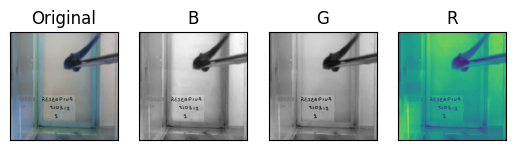

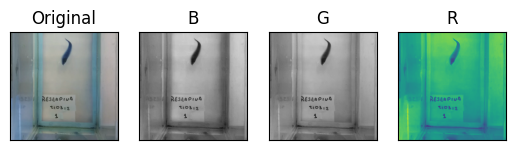

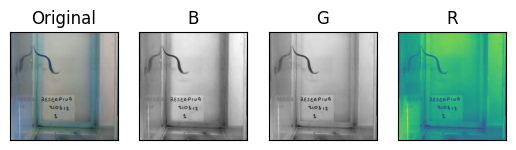

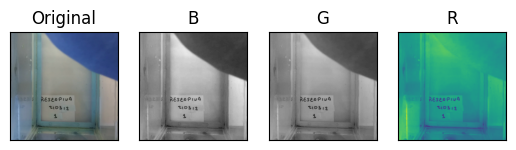

In [10]:
B = list()
G = list()
R = list()
for img in imgs:
    b, g, r = cv2.split(img)
    img = cv2.resize(img, (1080,1080))
    b = cv2.resize(b, (1080, 1080))
    g = cv2.resize(g, (1080, 1080))
    r = cv2.resize(r, (1080, 1080))

    B.append(b)
    G.append(g)
    R.append(R)

    plt.subplot(141),plt.imshow(img, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(142),plt.imshow(b, cmap = 'gray')
    plt.title('B'), plt.xticks([]), plt.yticks([])
    plt.subplot(143),plt.imshow(g, cmap = 'gray')
    plt.title('G'), plt.xticks([]), plt.yticks([])
    plt.subplot(144),plt.imshow(r)
    plt.title('R'), plt.xticks([]), plt.yticks([])
    plt.show()  

In [135]:
print(len(B))
print(len(G))
print(len(R))

4
4
4


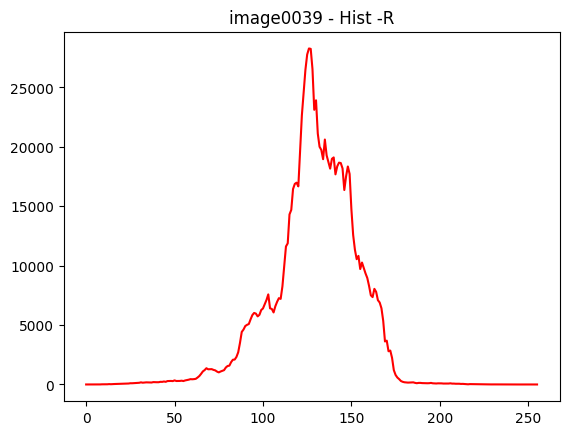

In [45]:
os.mkdir(outHist+"/Prueba")
os.chdir(outHist+"/Prueba")
for j, image in enumerate(imgs):
    # define colors to plot the histograms
    colors = ('b','g','r')
    hist = list()
    fname = os.path.splitext(file_names[j])[0]

    # compute and plot the image histograms
    for i,color in enumerate(colors):
        hist.append(cv2.calcHist([image],[i],None,[256],[0,256]))

    for i,h in enumerate(hist):
        plt.clf()
        plt.plot(h, colors[i])
        plt.title(fname + " - " + "Hist -" + colors[i].upper())
        plt.savefig(fname + " - " + colors[i].upper() + '.jpg')

os.chdir(dir)

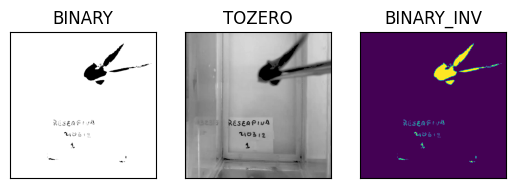

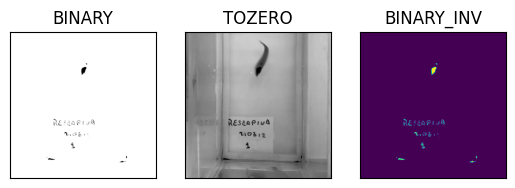

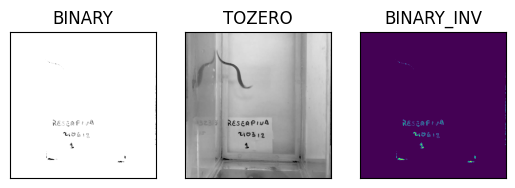

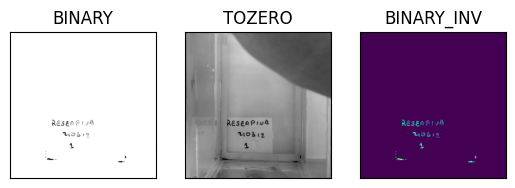

In [12]:
for i in range(0,4,1):
    # Threshold Blue Image
    #  60-70, 70-90, 100-110
    _, treshB = cv2.threshold(G[i], 50, 255, cv2.THRESH_BINARY )
    _, treshT = cv2.threshold(G[i], 50, 255, cv2.THRESH_TOZERO )
    # cv2.imshow('Thresh B', treshB)

    _, threshB = cv2.threshold(treshB, 70, 255, cv2.THRESH_BINARY_INV)
    # cv2.imshow("THRESH B INV", threshB)

    plt.subplot(231),plt.imshow(treshB, cmap = 'gray')
    plt.title('BINARY'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(treshT, cmap = 'gray')
    plt.title('TOZERO'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(threshB)
    plt.title('BINARY_INV'), plt.xticks([]), plt.yticks([])
    plt.show()
    # cv2.imshow("Threshold", np.hstack([treshB, threshB]))

    # # Threshold Green Image
    # 100-110, 130-140, 140-150, 170-185
    # _, treshG = cv2.threshold(np.hstack([G]), 185, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshG = cv2.resize(treshG,(512,512))
    # cv2.imshow('Thresh G', treshG)

    # Threshold Red Image
    # 50-70, 90-110, 130-150, 170-180
    # _, treshR = cv2.threshold(np.hstack([R]), 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)


# cv2.waitKey(0)
# cv2.destroyAllWindows()

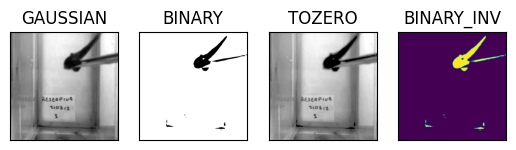

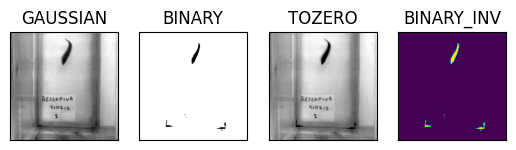

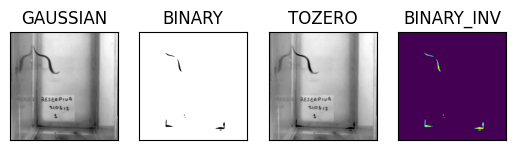

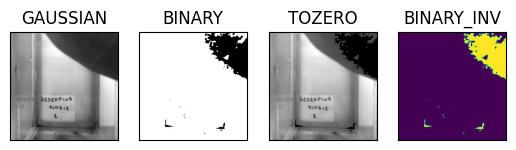

In [163]:
for i in range(0,4,1):
    dst = cv2.GaussianBlur(B[i],(11, 11),cv2.BORDER_DEFAULT)

    # Threshold Blue Image
    #  60-70, 70-90, 100-110
    _, treshB = cv2.threshold(dst, 50, 255, cv2.THRESH_BINARY )
    _, treshT = cv2.threshold(dst, 50, 255, cv2.THRESH_TOZERO )
    # cv2.imshow('Thresh B', treshB)

    _, threshB = cv2.threshold(treshB, 70, 255, cv2.THRESH_BINARY_INV)
    # cv2.imshow("THRESH B INV", threshB)

    plt.subplot(341),plt.imshow(dst, cmap = 'gray')
    plt.title('GAUSSIAN'), plt.xticks([]), plt.yticks([])
    plt.subplot(342),plt.imshow(treshB, cmap = 'gray')
    plt.title('BINARY'), plt.xticks([]), plt.yticks([])
    plt.subplot(343),plt.imshow(treshT, cmap = 'gray')
    plt.title('TOZERO'), plt.xticks([]), plt.yticks([])
    plt.subplot(344),plt.imshow(threshB)
    plt.title('BINARY_INV'), plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imshow("Canny", cv2.Canny(treshB, 0, 50))

    # # Threshold Green Image
    # 100-110, 130-140, 140-150, 170-185
    # _, treshG = cv2.threshold(np.hstack([G]), 185, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshG = cv2.resize(treshG,(512,512))
    # cv2.imshow('Thresh G', treshG)

    # Threshold Red Image
    # 50-70, 90-110, 130-150, 170-180
    # _, treshR = cv2.threshold(np.hstack([R]), 180, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)


    cv2.waitKey(500)
cv2.destroyAllWindows()

### Utilizando el filtro Gausiano

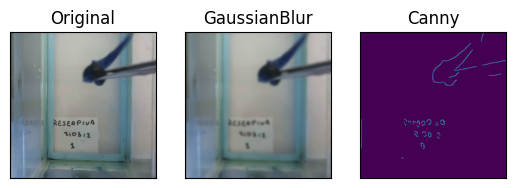

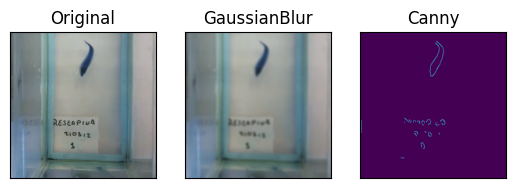

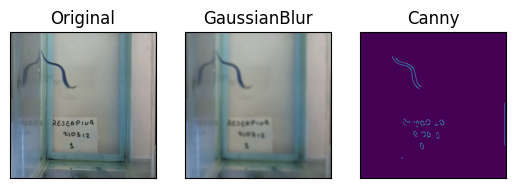

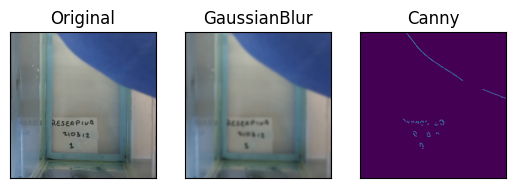

In [154]:
for img in imgs:
    img = cv2.resize(img, (512,512))
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    dst = cv2.GaussianBlur(img,(11,11),cv2.BORDER_DEFAULT)

    canny = cv2.Canny(dst, 75, 80)

    # _, treshR = cv2.threshold(np.hstack([dst]), 80, 255, cv2.THRESH_BINARY)
    # treshR = cv2.resize(treshR,(512,512))
    # cv2.imshow('Thresh R', treshR)
    cv2.imshow("Canny ", canny)

    plt.subplot(231),plt.imshow(img, cmap = 'gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    plt.subplot(232),plt.imshow(dst, cmap = 'gray')
    plt.title('GaussianBlur'), plt.xticks([]), plt.yticks([])
    plt.subplot(233),plt.imshow(canny)
    plt.title('Canny'), plt.xticks([]), plt.yticks([])
    plt.show()

    cv2.waitKey(1000)
cv2.destroyAllWindows()